# K-Means Clustering Algorithm Implementation

In [4]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
%matplotlib inline

In [6]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)
# In clustering we dont ake value of y given byt this.

In [8]:
X.shape # 2 features and 1000 data points

(1000, 2)

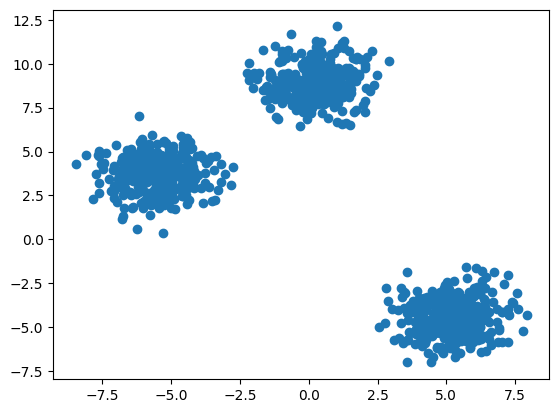

In [12]:
plt.scatter(X[:,0],X[:,1],)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)


In [14]:
from sklearn.cluster import KMeans

In [16]:
# Let us Start With Manual Way
# Elbow Method to Select the K Value

wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train) 
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[34827.57682552021,
 7935.4372861454185,
 1319.2730531585605,
 1171.4379638359776,
 1017.5663459421104,
 949.7658967086777,
 771.1270787645733,
 724.288251816061,
 628.2873517081442,
 546.0327830824484]

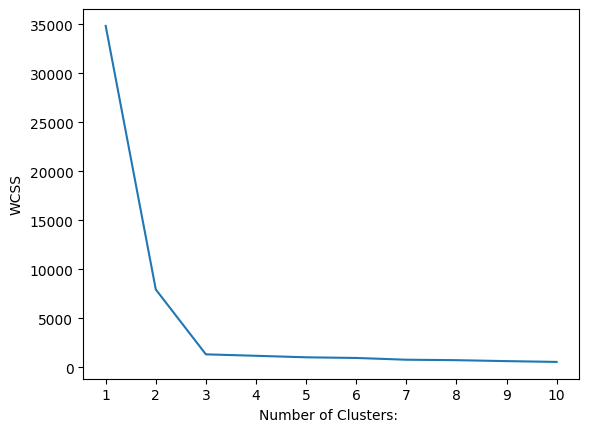

In [32]:
# Plot Elbow Curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters: ")
plt.ylabel("WCSS")
plt.show()

In [50]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [51]:
y_labels = kmeans.fit_predict(X_train)

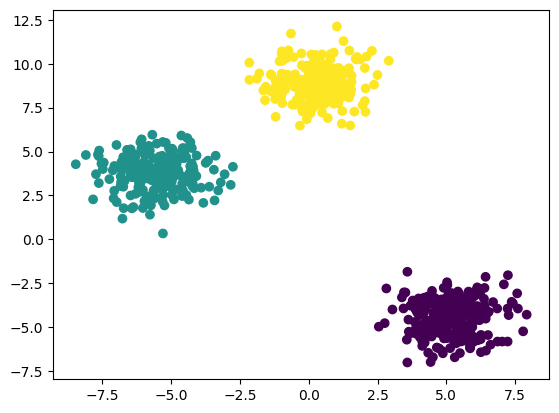

In [52]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [53]:
y_test_labels = kmeans.predict(X_test)

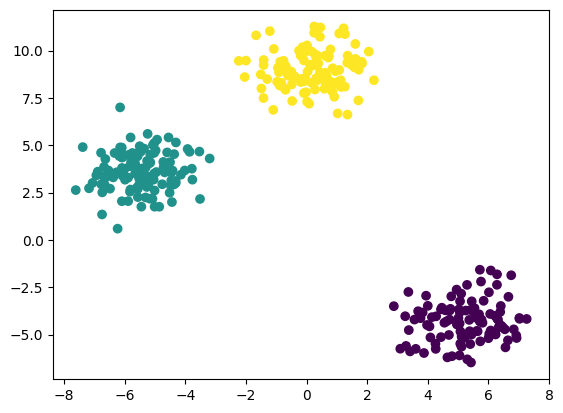

In [54]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [55]:
# Since this was the Manual way, we can directly do by Knee Locator

In [56]:
# We have another library in sklearn knee locator

In [57]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [58]:
from kneed import KneeLocator

In [61]:
kl = KneeLocator(range(1,11),wcss,curve='convex', direction='decreasing')
print(f"So the Number of Clusters is: {kl.elbow}")
# When wcss graph increases then we will use concave here
# When wcss graph decreases then we will use concvex here

So the Number of Clusters is: 3


In [65]:
## Performance Matrix for Performance Validation
from sklearn.metrics import silhouette_score

silhouette_cofficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_cofficients.append(score)
    


In [67]:
print(silhouette_cofficients)

[0.7281443868598331, 0.8071181203797672, 0.6505454471731087, 0.474362959865786, 0.3342665605009231, 0.48437019603742126, 0.3338076773060788, 0.3228271330228553, 0.34003257039494583]


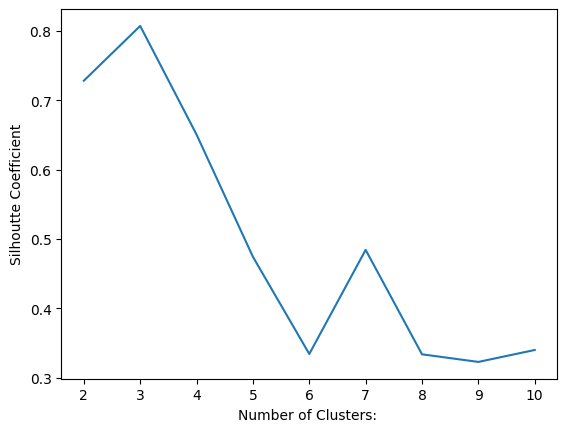

In [68]:
plt.plot(range(2,11), silhouette_cofficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters: ")
plt.ylabel("Silhoutte Coefficient")
plt.show()